In [ ]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data2 = pd.read_csv('Traffic_Volume_Counts__2014-2020_.csv')
data2.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


In [ ]:
data2.shape

(33418, 31)

In [ ]:
data2.describe()

,ID,Segment ID,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
count,33418.000000,3.341800e+04,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,...,33418.000000,33418.000000,33418.000000,33418.000000,33418.000000,33418.000000,33418.000000,33418.000000,33418.000000,33418.000000
mean,180.701388,6.182645e+05,263.678398,186.262674,139.872628,121.521638,142.110163,222.333962,377.363620,511.258275,...,666.186426,691.906847,695.857352,691.078670,662.335747,604.032557,527.075738,454.408313,399.325932,333.052846
std,107.257568,2.105587e+06,425.244883,311.787220,243.908961,216.343834,259.821774,447.052153,664.369828,736.493894,...,805.739203,825.929013,821.638251,814.219679,809.488006,777.704832,721.090275,651.994253,597.227319,517.365776
min,1.000000,2.020000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,3.525700e+04,62.000000,39.000000,27.000000,23.000000,28.000000,44.000000,78.000000,132.000000,...,257.000000,265.000000,266.000000,265.000000,243.000000,212.000000,173.000000,138.000000,112.000000,85.000000
50%,175.000000,8.138400e+04,121.000000,82.000000,58.000000,49.000000,58.000000,88.000000,161.000000,270.000000,...,417.000000,435.000000,438.000000,435.000000,405.000000,355.000000,296.000000,243.000000,203.000000,162.000000
75%,275.000000,1.484070e+05,252.000000,179.000000,134.000000,114.000000,129.000000,190.000000,351.000000,549.000000,...,702.000000,736.000000,747.750000,748.000000,701.000000,619.000000,527.000000,444.000000,381.000000,315.000000
max,373.000000,9.017050e+06,4805.000000,3841.000000,3867.000000,3512.000000,4469.000000,6456.000000,7513.000000,8276.000000,...,6996.000000,7524.000000,8683.000000,9762.000000,9879.000000,10532.000000,6659.000000,5698.000000,5460.000000,5027.000000


In [ ]:
data2.dropna(inplace=True)
data2= data2.drop(['Roadway Name', 'From', 'To'], axis=1)

In [ ]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2['year'] = data2['Date'].dt.year

In [ ]:
sanityindex = (data2.year >= 2018) & (data2.year <= 2020)
data2 = data2[sanityindex]

In [ ]:
data2['Date'].value_counts()

2019-10-13    391
2019-10-12    391
2020-11-15    314
2020-11-14    314
2019-10-06    291
             ... 
2020-12-07      1
2020-12-06      1
2020-12-08      1
2020-12-12      1
2020-12-09      1
Name: Date, Length: 146, dtype: int64

In [ ]:
data2.columns=['ID']+['Segment ID']+['Direction']+['Date']+[i for i in range(0,24)]+['year']

In [ ]:
data2['sum'] = data2.iloc[:,4:28].sum(axis=1)

In [ ]:
data2.reset_index(inplace = True)
data2= data2.drop(['index'], axis=1)

In [ ]:
data2.head()

,ID,Segment ID,Direction,Date,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,year,sum
0,25,9001279,NB,2019-10-09,507.0,360.0,225.0,196.0,189.0,249.0,...,1157,1145,931,992,748,734,758,694,2019,15814.0
1,25,9001279,NB,2019-10-10,519.0,313.0,225.0,192.0,197.0,244.0,...,1169,1160,931,974,756,714,740,687,2019,15739.0
2,25,9001279,NB,2019-10-11,615.0,442.0,335.0,234.0,237.0,249.0,...,1077,1113,966,836,813,839,731,668,2019,16366.0
3,25,9001279,NB,2019-10-12,658.0,619.0,427.0,330.0,308.0,256.0,...,953,859,878,779,688,637,684,689,2019,15166.0
4,25,9001279,NB,2019-10-13,718.0,670.0,437.0,362.0,300.0,252.0,...,855,784,772,710,837,782,700,611,2019,14271.0


In [ ]:
data2.shape

(12532, 30)

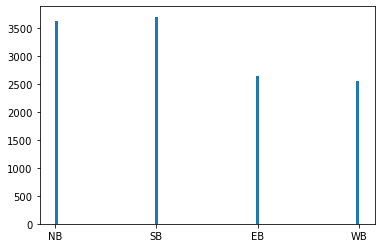

In [ ]:
n_bins = 100
plt.hist(data2.Direction, bins=n_bins);

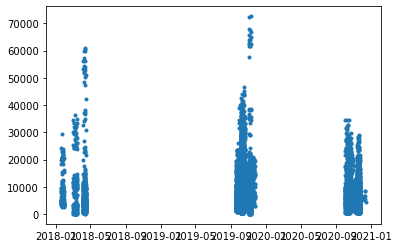

In [ ]:
plt.plot(data2['Date'],data2['sum'],'.')

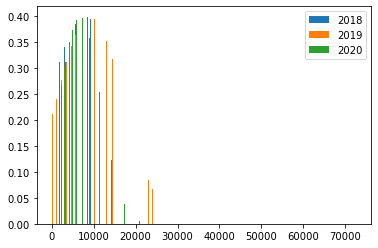

In [ ]:
values2018 = data2.loc[data2['year']==2018]['sum'].values
values2018_pdf = (values2018 - values2018.mean())/values2018.std()
values2019 = data2.loc[data2['year']==2019]['sum'].values
values2019_pdf = (values2019 - values2019.mean())/values2019.std()
values2020 = data2.loc[data2['year']==2020]['sum'].values
values2020_pdf = (values2020 - values2020.mean())/values2020.std()

plt.bar(values2018,stats.norm.pdf(values2018_pdf),label='2018')
plt.bar(values2019,stats.norm.pdf(values2019_pdf),label='2019')
plt.bar(values2020,stats.norm.pdf(values2020_pdf),label='2020')

plt.legend()

In [ ]:
# group by
VolumeByDire = data2.groupby(by='Direction', as_index=False).mean()[['Direction', 'sum']]
VolumeByDire.head()

,Direction,sum
0,EB,6823.581949
1,NB,8689.996970
2,SB,8765.759254
3,WB,6939.291814


<AxesSubplot:>

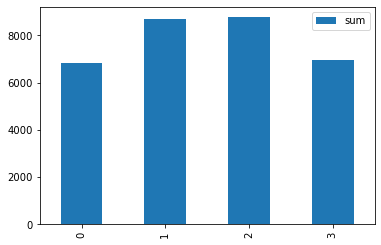

In [ ]:
VolumeByDire.plot(kind='bar')

<AxesSubplot:>

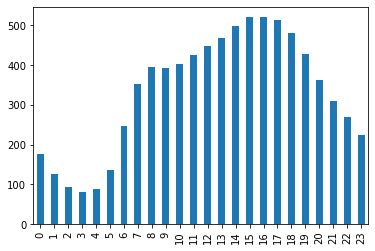

In [ ]:
hourdata = data2.iloc[:,4:28]
hourdata.mean().plot(kind='bar')